In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [10]:
from mnist import MNIST
mndata = MNIST()

In [11]:
#Load the data
X_train, y_train = mndata.load('emnist/emnist_source_files/emnist-byclass-train-images-idx3-ubyte',
                               'emnist/emnist_source_files/emnist-byclass-train-labels-idx1-ubyte')
X_test, y_test = mndata.load('emnist/emnist_source_files/emnist-byclass-test-images-idx3-ubyte',
                             'emnist/emnist_source_files/emnist-byclass-test-labels-idx1-ubyte')

In [12]:
# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

In [13]:
X_train.shape

(697932, 784)

In [14]:
y_train.shape

(697932,)

In [15]:
#Reshaping all images into 28*28 for pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

<function matplotlib.pyplot.show(*args, **kw)>

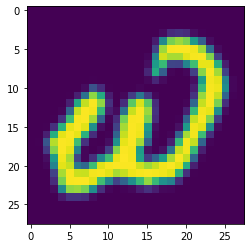

In [16]:
#Display a random image
plt.imshow(X_train[20])
plt.show

In [17]:
#Image array
X_train[20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Process Complete: Rotated and reversed train images!


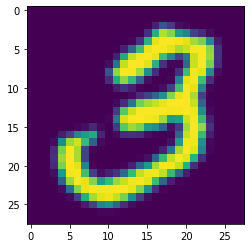

In [18]:
#Since the images are not in right shape process the images
#for train data
for t in range(697932):
    X_train[t]=np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[20])
plt.show
print('Process Complete: Rotated and reversed train images!')

Process Complete: Rotated and reversed train images!


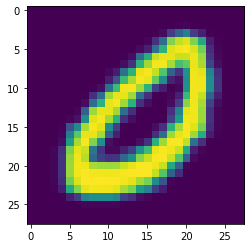

In [19]:
#for test data  
for t in range(116323):
    X_test[t]=np.transpose(X_test[t])

#checking
plt.imshow(X_test[2])
plt.show
print('Process Complete: Rotated and reversed train images!')

In [20]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

In [21]:
import keras
from keras.models import Sequential
from keras import optimizers
from keras.utils import np_utils
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense,Reshape

In [22]:
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

In [23]:
train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)

In [24]:
classifier = Sequential()
classifier.add(Reshape((28,28,1), input_shape=(784,)))
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
#Hidden Layer
classifier.add(Dense(units = 512 ,activation = 'relu'))
classifier.add(Dropout(0.5))
#Output Layer
classifier.add(Dense(62, activation='softmax'))

In [25]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2769408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 62)                31806     
Total para

In [27]:
history = classifier.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=256, epochs=30)

Train on 697932 samples, validate on 116323 samples
Epoch 1/30
697932/697932 [==============================] - 973s 1ms/step - loss: 0.6573 - acc: 0.7912 - val_loss: 0.4325 - val_acc: 0.8471
Epoch 2/30
697932/697932 [==============================] - 1118s 2ms/step - loss: 0.4754 - acc: 0.8358 - val_loss: 0.4021 - val_acc: 0.8555
Epoch 3/30
697932/697932 [==============================] - 1190s 2ms/step - loss: 0.4427 - acc: 0.8442 - val_loss: 0.3890 - val_acc: 0.8586
Epoch 4/30
697932/697932 [==============================] - 1041s 1ms/step - loss: 0.4220 - acc: 0.8497 - val_loss: 0.3801 - val_acc: 0.8613
Epoch 5/30
697932/697932 [==============================] - 918s 1ms/step - loss: 0.4070 - acc: 0.8536 - val_loss: 0.3728 - val_acc: 0.8635
Epoch 6/30
697932/697932 [==============================] - 1034s 1ms/step - loss: 0.3939 - acc: 0.8570 - val_loss: 0.3711 - val_acc: 0.8639
Epoch 7/30
697932/697932 [==============================] - 1113s 2ms/step - loss: 0.3825 - acc: 0.8602 

In [43]:
_, test_acc = classifier.evaluate(test_images, test_labels)
test_acc

116323/116323 [==============================] - 71s 609us/step


0.8624175786387903

# Evaluation of Dataset Size Vs Accuracy

In [60]:
train_images.shape

(697932, 784)

For 9k

In [70]:
train_images1 = train_images[:9000,:]
print(train_images1.shape)
train_labels1 = train_labels[:9000,:]
print(train_labels1.shape)

(9000, 784)
(9000, 62)


For 27k

In [72]:
train_images2 = train_images[:27000,:]
print(train_images2.shape)
train_labels2 = train_labels[:27000,:]
print(train_labels2.shape)

(27000, 784)
(27000, 62)


For 80k

In [76]:
train_images3 = train_images[:80000,:]
print(train_images3.shape)
train_labels3 = train_labels[:80000,:]
print(train_labels3.shape)

(80000, 784)
(80000, 62)


For 240k

In [78]:
train_images4 = train_images[:240000,:]
print(train_images4.shape)
train_labels4 = train_labels[:240000,:]
print(train_labels4.shape)

(240000, 784)
(240000, 62)


# Model Evaluation

In [79]:
classifier1 = Sequential()
classifier1.add(Reshape((28,28,1), input_shape=(784,)))
classifier1.add(Convolution2D(32,(3,3),activation='relu'))
classifier1.add(MaxPooling2D(pool_size=(2, 2)))
classifier1.add(Flatten())
#Hidden Layer
classifier1.add(Dense(units = 512 ,activation = 'relu'))
classifier1.add(Dropout(0.5))
#Output Layer
classifier1.add(Dense(62, activation='softmax'))

In [80]:
classifier1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
history1 = classifier1.fit(train_images1,train_labels1,validation_data=(test_images, test_labels), batch_size=256, epochs=30)

Train on 9000 samples, validate on 116323 samples
Epoch 1/30
9000/9000 [==============================] - 74s 8ms/step - loss: 2.5015 - acc: 0.3982 - val_loss: 1.5095 - val_acc: 0.6103
Epoch 2/30
9000/9000 [==============================] - 50s 6ms/step - loss: 1.4702 - acc: 0.6031 - val_loss: 1.1757 - val_acc: 0.6619
Epoch 3/30
9000/9000 [==============================] - 49s 5ms/step - loss: 1.1971 - acc: 0.6517 - val_loss: 1.0371 - val_acc: 0.6987
Epoch 4/30
9000/9000 [==============================] - 49s 5ms/step - loss: 1.0256 - acc: 0.6953 - val_loss: 0.9266 - val_acc: 0.7252
Epoch 5/30
9000/9000 [==============================] - 50s 6ms/step - loss: 0.8959 - acc: 0.7274 - val_loss: 0.8599 - val_acc: 0.7394
Epoch 6/30
9000/9000 [==============================] - 49s 5ms/step - loss: 0.8049 - acc: 0.7467 - val_loss: 0.8076 - val_acc: 0.7525
Epoch 7/30
9000/9000 [==============================] - 49s 5ms/step - loss: 0.7172 - acc: 0.7681 - val_loss: 0.7811 - val_acc: 0.7595
Epoch

In [82]:
_, test_acc1 = classifier1.evaluate(test_images, test_labels)
test_acc1

116323/116323 [==============================] - 53s 453us/step


0.7860526293171566

In [83]:
classifier2 = Sequential()
classifier2.add(Reshape((28,28,1), input_shape=(784,)))
classifier2.add(Convolution2D(32,(3,3),activation='relu'))
classifier2.add(MaxPooling2D(pool_size=(2, 2)))
classifier2.add(Flatten())
#Hidden Layer
classifier2.add(Dense(units = 512 ,activation = 'relu'))
classifier2.add(Dropout(0.5))
#Output Layer
classifier2.add(Dense(62, activation='softmax'))

In [84]:
classifier2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
history2 = classifier2.fit(train_images2,train_labels2,validation_data=(test_images, test_labels), batch_size=256, epochs=30)

Train on 27000 samples, validate on 116323 samples
Epoch 1/30
27000/27000 [==============================] - 71s 3ms/step - loss: 1.8154 - acc: 0.5344 - val_loss: 1.0308 - val_acc: 0.7059
Epoch 2/30
27000/27000 [==============================] - 70s 3ms/step - loss: 1.0337 - acc: 0.6964 - val_loss: 0.7876 - val_acc: 0.7591
Epoch 3/30
27000/27000 [==============================] - 69s 3ms/step - loss: 0.8142 - acc: 0.7460 - val_loss: 0.6817 - val_acc: 0.7854
Epoch 4/30
27000/27000 [==============================] - 69s 3ms/step - loss: 0.6937 - acc: 0.7799 - val_loss: 0.6203 - val_acc: 0.8005
Epoch 5/30
27000/27000 [==============================] - 70s 3ms/step - loss: 0.6207 - acc: 0.7960 - val_loss: 0.5898 - val_acc: 0.8081
Epoch 6/30
27000/27000 [==============================] - 70s 3ms/step - loss: 0.5666 - acc: 0.8114 - val_loss: 0.5688 - val_acc: 0.8124
Epoch 7/30
27000/27000 [==============================] - 69s 3ms/step - loss: 0.5298 - acc: 0.8190 - val_loss: 0.5579 - val_ac

In [86]:
_, test_acc2 = classifier2.evaluate(test_images, test_labels)
test_acc2

116323/116323 [==============================] - 52s 451us/step


0.8218666987617205

In [87]:
classifier3 = Sequential()
classifier3.add(Reshape((28,28,1), input_shape=(784,)))
classifier3.add(Convolution2D(32,(3,3),activation='relu'))
classifier3.add(MaxPooling2D(pool_size=(2, 2)))
classifier3.add(Flatten())
#Hidden Layer
classifier3.add(Dense(units = 512 ,activation = 'relu'))
classifier3.add(Dropout(0.5))
#Output Layer
classifier3.add(Dense(62, activation='softmax'))

In [88]:
classifier3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
history3 = classifier3.fit(train_images3,train_labels3,validation_data=(test_images, test_labels), batch_size=256, epochs=30)

Train on 80000 samples, validate on 116323 samples
Epoch 1/30
80000/80000 [==============================] - 132s 2ms/step - loss: 1.2414 - acc: 0.6577 - val_loss: 0.6973 - val_acc: 0.7820
Epoch 2/30
80000/80000 [==============================] - 131s 2ms/step - loss: 0.7157 - acc: 0.7760 - val_loss: 0.5623 - val_acc: 0.8158
Epoch 3/30
80000/80000 [==============================] - 130s 2ms/step - loss: 0.6010 - acc: 0.8027 - val_loss: 0.5112 - val_acc: 0.8290
Epoch 4/30
80000/80000 [==============================] - 130s 2ms/step - loss: 0.5415 - acc: 0.8183 - val_loss: 0.4947 - val_acc: 0.8301
Epoch 5/30
80000/80000 [==============================] - 130s 2ms/step - loss: 0.5073 - acc: 0.8265 - val_loss: 0.4755 - val_acc: 0.8380
Epoch 6/30
80000/80000 [==============================] - 130s 2ms/step - loss: 0.4806 - acc: 0.8334 - val_loss: 0.4723 - val_acc: 0.8370
Epoch 7/30
80000/80000 [==============================] - 130s 2ms/step - loss: 0.4573 - acc: 0.8401 - val_loss: 0.4604 -

In [90]:
_, test_acc3 = classifier3.evaluate(test_images, test_labels)
test_acc3

116323/116323 [==============================] - 54s 467us/step


0.8432038375901585

In [91]:
classifier4 = Sequential()
classifier4.add(Reshape((28,28,1), input_shape=(784,)))
classifier4.add(Convolution2D(32,(3,3),activation='relu'))
classifier4.add(MaxPooling2D(pool_size=(2, 2)))
classifier4.add(Flatten())
#Hidden Layer
classifier4.add(Dense(units = 512 ,activation = 'relu'))
classifier4.add(Dropout(0.5))
#Output Layer
classifier4.add(Dense(62, activation='softmax'))

In [92]:
classifier4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
history4 = classifier4.fit(train_images4,train_labels4,validation_data=(test_images, test_labels), batch_size=256, epochs=30)

Train on 240000 samples, validate on 116323 samples
Epoch 1/30
240000/240000 [==============================] - 325s 1ms/step - loss: 0.8783 - acc: 0.7393 - val_loss: 0.5121 - val_acc: 0.8275
Epoch 2/30
240000/240000 [==============================] - 313s 1ms/step - loss: 0.5544 - acc: 0.8153 - val_loss: 0.4667 - val_acc: 0.8387
Epoch 3/30
240000/240000 [==============================] - 314s 1ms/step - loss: 0.5010 - acc: 0.8282 - val_loss: 0.4390 - val_acc: 0.8454
Epoch 4/30
240000/240000 [==============================] - 314s 1ms/step - loss: 0.4713 - acc: 0.8367 - val_loss: 0.4242 - val_acc: 0.8495
Epoch 5/30
240000/240000 [==============================] - 314s 1ms/step - loss: 0.4507 - acc: 0.8419 - val_loss: 0.4142 - val_acc: 0.8524
Epoch 6/30
240000/240000 [==============================] - 312s 1ms/step - loss: 0.4338 - acc: 0.8452 - val_loss: 0.4106 - val_acc: 0.8534
Epoch 7/30
240000/240000 [==============================] - 313s 1ms/step - loss: 0.4200 - acc: 0.8495 - val

In [94]:
_, test_acc4 = classifier4.evaluate(test_images, test_labels)
test_acc4

116323/116323 [==============================] - 53s 454us/step


0.8544913731597329

# Accuracy Vs Dataset Size

In [98]:
sizes = [9,27,80,240,627]

In [108]:
acc =[test_acc1*100,test_acc2*100,test_acc3*100,test_acc4*100,test_acc*100,]
acc

[78.60526293171566,
 82.18666987617205,
 84.32038375901585,
 85.44913731597329,
 86.24175786387903]

<function matplotlib.pyplot.show(*args, **kw)>

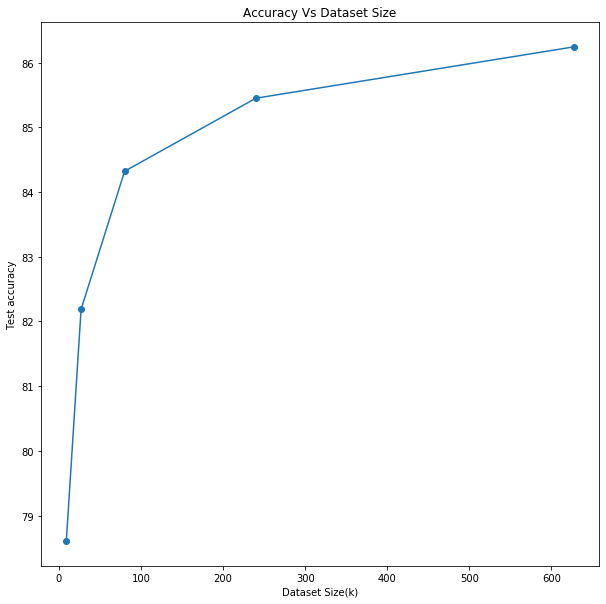

In [117]:
plt.figure(figsize=(10,10))
plt.title("Accuracy Vs Dataset Size")
plt.xlabel('Dataset Size(k)')
plt.ylabel('Test accuracy')
plt.plot(sizes,acc ,marker='o')
plt.show

In [119]:
from sklearn.externals import joblib 
joblib.dump(classifier, 'model_classifier') 


['model_classifier']